# Exersice 1 : Histogram Equalization algorithm
## Shahab Esfandiar_9819373

### Import required packages

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Import data

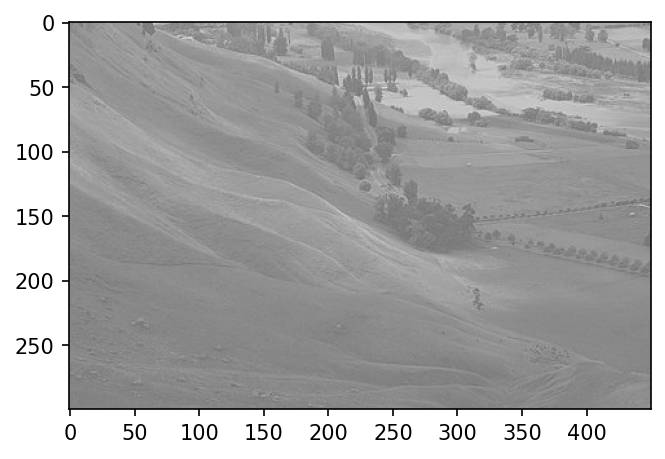

In [3]:
img = cv2.imread('Unequalized_image.jpg')
plt.figure(figsize=(5, 5), dpi=150)
plt.imshow(img)

### Create histogram equalization function

In [4]:
def EqualizeHisto(img):
    
    # Normalize histogram and find pixel value
    height = img.shape[0]
    width  = img.shape[1]
    hist = np.zeros([256], np.int32) 
    
    for i in range(0, height):    
        for j in range(0, width):
            hist[img[i, j]] +=1
            
    # Calculate Pr & Cumulative distribution function
    Pr = hist / hist.sum()
    CDF = np.zeros(256, float)
    CDF[0] = Pr[0]
    
    for i in range(1, 256):
        CDF[i] = CDF[i-1] + Pr[i]
     
    CDF_img = np.round(CDF * 255, 0)
    
    # Equalize our new image pixel value
    img_eq = np.zeros((height, width))
    
    for i in range(0, height):
        for j in range(0, width):
            
            r = img[i, j] 
            s_img = CDF_img[r] 
            img_eq[i, j] = s_img
    
    return img_eq

### Create image formating function

In [5]:
def Myfloat2int(img):
    
    #Convert float pixel value to integer
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

### Plot results

([<matplotlib.lines.Line2D at 0x2c44c725c10>],
 Text(0.5, 1.0, 'Equalized histogram'))

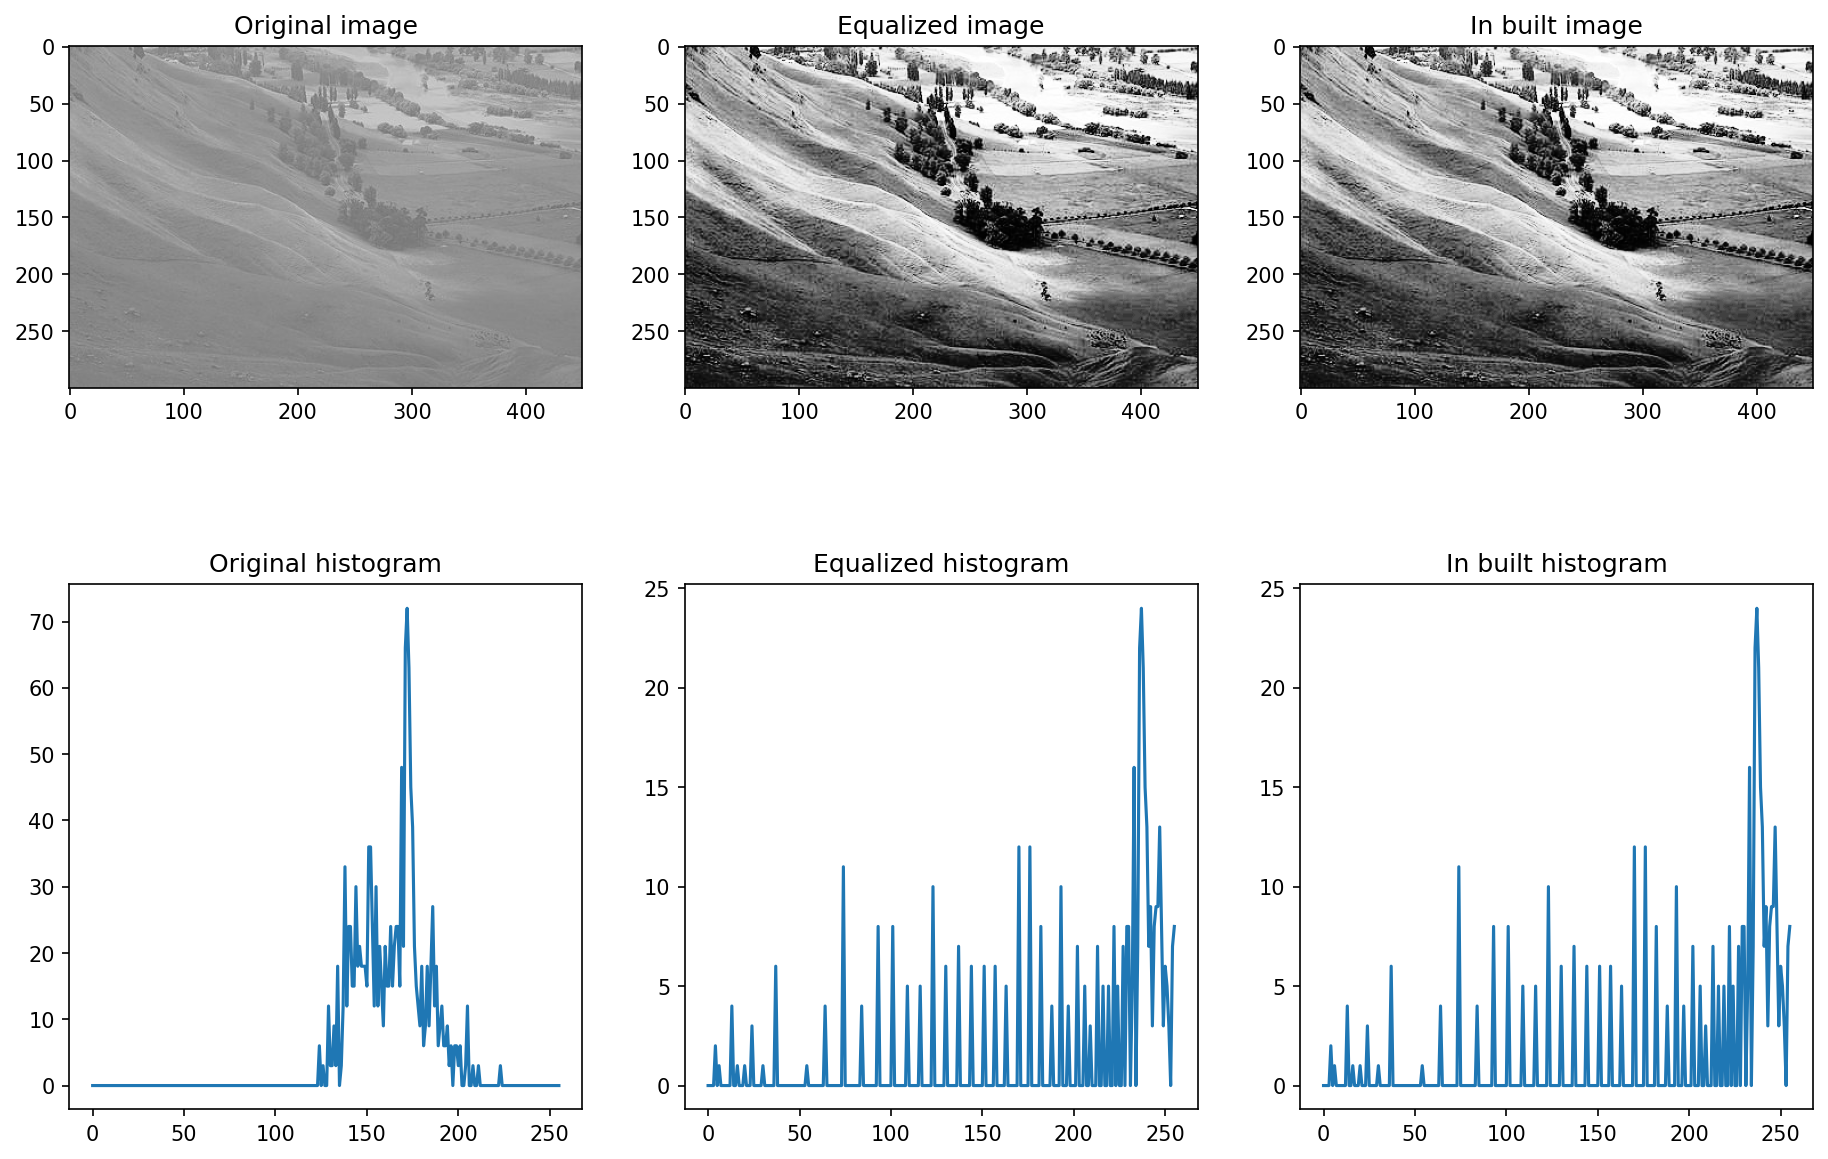

In [19]:
img_GS = cv2.imread('Unequalized_image.jpg', cv2.IMREAD_GRAYSCALE)

Equalized_img = EqualizeHisto(img_GS)
Equalized_img = Myfloat2int(Equalized_img)
InBuilt_img = cv2.equalizeHist(img_GS)

Histogram = cv2.calcHist(img, [0], None, [256], [0, 256])
Histogram_eq = cv2.calcHist(Equalized_img, [0], None, [256], [0, 256])
Histogram_InBuilt = cv2.calcHist(InBuilt_img, [0], None, [256], [0, 256])

plt.figure(figsize=(15, 10), dpi=150)
plt.subplot(2, 3, 1);plt.imshow(img, cmap ='gray'), plt.title('Original image')
plt.subplot(2, 3, 4);plt.plot(Histogram), plt.title('Original histogram')
plt.subplot(2, 3, 3);plt.imshow(InBuilt_img, cmap ='gray'), plt.title('In built image')
plt.subplot(2, 3, 6);plt.plot(Histogram_InBuilt), plt.title('In built histogram')
plt.subplot(2, 3, 2);plt.imshow(Equalized_img, cmap ='gray'), plt.title('Equalized image')
plt.subplot(2, 3, 5);plt.plot(Histogram_eq), plt.title('Equalized histogram')